In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [8]:
df_=pd.read_csv('raw_dataset.csv')
df=df_.copy()

In [16]:
def check_df(dataframe,rows=5,plot=False):
    cat_cols=[col for col in dataframe.columns if str(dataframe[col].dtypes) in ["object","category","bool"]]
    num_cols=[col for col in dataframe.columns if col not in cat_cols]
    print("----------------------------------------Head----------------------------------------")
    print(dataframe.head(rows))
    print("----------------------------------------Tail----------------------------------------")
    print(dataframe.tail(rows))
    print("----------------------------------------Shape----------------------------------------")
    print(dataframe.shape)
    print("----------------------------------------Info----------------------------------------")
    print(dataframe.info())
    print("----------------------------------------Columns----------------------------------------")
    print(dataframe.columns)
    print("----------------------------------------Index----------------------------------------")
    print(dataframe.index)
    print("----------------------------------------Null Count----------------------------------------")
    print(dataframe.isnull().sum())
    print("----------------------------------------Describe----------------------------------------")
    print(dataframe.describe([0.05,0.25,0.5,0.75,0.95,0.99]).T)
    def cat_summary(dataframe):
        for col in cat_cols:
            print("---------------"+col+"---------------")
            print(pd.DataFrame({"Count":dataframe[col].value_counts(),
                                "Ratio":100*dataframe[col].value_counts()/len(dataframe)}))
            if plot:
                sns.countplot(x=col,data=dataframe)
                plt.show(block=True)
    cat_summary(dataframe)

----------------------------------------Head----------------------------------------
   empid  satisfaction_level  last_evaluation  number_project  \
0      1                0.38             0.53               2   
1      2                0.80             0.86               5   
2      3                0.11             0.88               7   
3      4                0.72             0.87               5   
4      5                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  \
0                   157                   3              0   
1                   262                   6              0   
2                   272                   4              0   
3                   223                   5              0   
4                   159                   3              0   

   promotion_last_5years  salary  left  
0                      0     low     1  
1                      0  medium     1  
2                      0  me

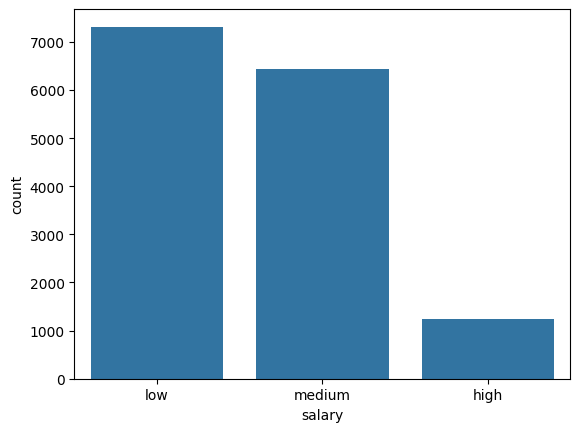

In [17]:
check_df(df,plot=True)

## Notes
##### As shown above we have a dataset with 9 numeric features (some of them is categorical) and 1 object feature.
##### The numeric and categorical features are: Work_accident,left,promotion_last_5years
##### The numeric and percentage features are: satisfaction_level,last_evaluation
##### We have 2 missing values in the satisfaction_level feature.
##### There is an imbalance in the distribution of the salary feature, it may point to the management staff    

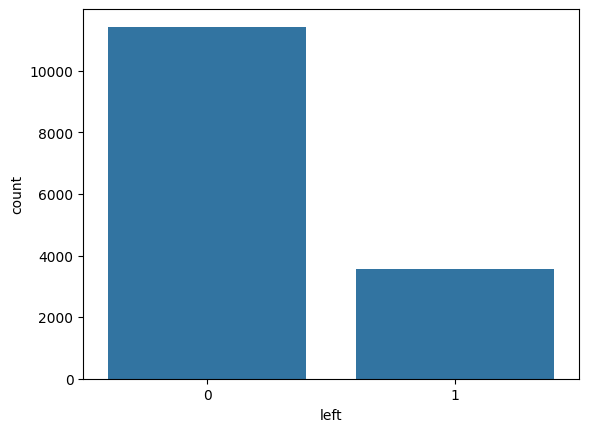

In [18]:
sns.countplot(x='left',data=df);

In [41]:
pd.crosstab([df['salary'], df["promotion_last_5years"]],df['left'], normalize='index') * 100


left                                   0          1
salary promotion_last_5years                       
high   0                       92.961373   7.038627
       1                      100.000000   0.000000
low    0                       70.234483  29.765517
       1                       78.787879  21.212121
medium 0                       79.058260  20.941740
       1                       97.237569   2.762431

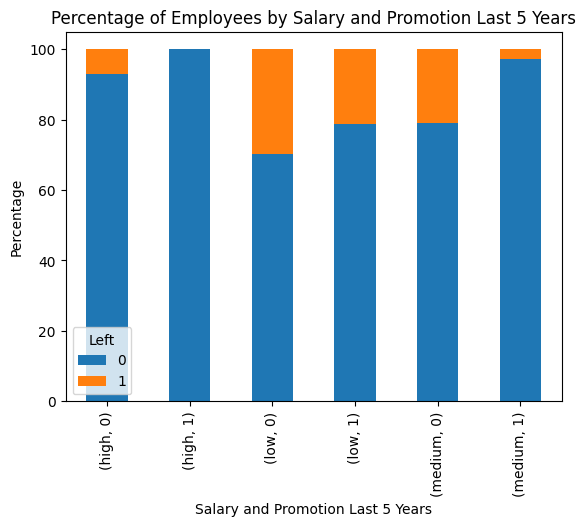

In [ ]:
result = pd.crosstab([df['salary'], df["promotion_last_5years"]],df['left'], normalize='index') * 100
result.plot(kind='bar', stacked=True)
plt.xlabel('Salary and Promotion Last 5 Years')
plt.ylabel('Percentage')
plt.title('Percentage of Employees by Salary and Promotion Last 5 Years')
plt.legend(title='Left')
plt.show()

## Notes
##### We can see that none of the high salary employees that got promoted in the last 5 years had left the company.
##### The low salary employees that didn't get promoted in the last 5 years are the most likely to leave the company.
##### The promoted low salary employees and the not promoted medium salary employees are equally likely to leave the company.
##### We can assume that the promotion has an effect over the employees resign decision.(proof needed)

In [26]:
df.columns

Index(['empid', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'left'],
      dtype='object')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB
